In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/marvel_comics/

/gdrive/MyDrive/marvel_comics


In [4]:
ls

evil/  good/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [29]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/marvel_comics",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 597 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['evil', 'good']

In [10]:
len(dataset)

10

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[237.       236.       242.      ]
  [235.71875  234.71875  240.71875 ]
  [233.53125  232.53125  238.53125 ]
  ...
  [254.46875  254.46875  252.46875 ]
  [252.28125  252.28125  250.28125 ]
  [251.       251.       249.      ]]

 [[234.75781  233.75781  239.75781 ]
  [233.47656  232.47656  238.47656 ]
  [231.28906  230.28906  236.28906 ]
  ...
  [252.46179  252.46179  250.46179 ]
  [249.92395  249.92395  247.92395 ]
  [248.4375   248.4375   246.4375  ]]

 [[230.92969  229.92969  235.92969 ]
  [229.64844  228.64844  234.64844 ]
  [227.46094  226.46094  232.46094 ]
  ...
  [249.03528  249.03528  247.03528 ]
  [245.89929  245.89929  243.89929 ]
  [244.0625   244.0625   242.0625  ]]

 ...

 [[249.26562   54.265625  98.265625]
  [249.94879   56.550354  98.62848 ]
  [251.11517   60.45111   99.247986]
  ...
  [230.92188  234.92188  235.92188 ]
  [241.3125   245.3125   246.3125  ]
  [247.39844  251.39844  252.39844 ]]

 [[250.35938   55.359375  99.359375]
  [251.2

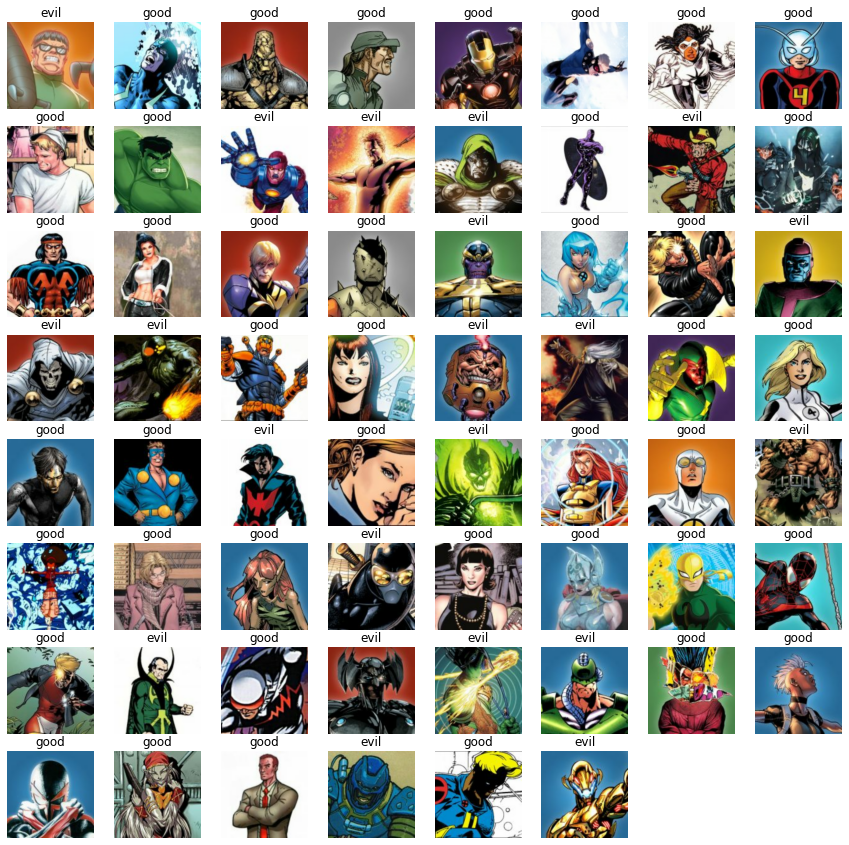

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
8/8 [==============================] - 55s 7s/step - loss: 0.6433 - accuracy: 0.6593 - val_loss: 0.5182 - val_accuracy: 0.7581
Epoch 2/20
8/8 [==============================] - 54s 7s/step - loss: 0.5512 - accuracy: 0.7419 - val_loss: 0.4148 - val_accuracy: 0.8226
Epoch 3/20
8/8 [==============================] - 54s 7s/step - loss: 0.4990 - accuracy: 0.7460 - val_loss: 0.4322 - val_accuracy: 0.7903
Epoch 4/20
8/8 [==============================] - 54s 7s/step - loss: 0.4909 - accuracy: 0.7460 - val_loss: 0.5243 - val_accuracy: 0.6774
Epoch 5/20
8/8 [==============================] - 57s 7s/step - loss: 0.4808 - accuracy: 0.7722 - val_loss: 0.4179 - val_accuracy: 0.8548
Epoch 6/20
8/8 [==============================] - 54s 7s/step - loss: 0.4279 - accuracy: 0.8125 - val_loss: 0.3210 - val_accuracy: 0.8387
Epoch 7/20
8/8 [==============================] - 54s 7s/step - loss: 0.3287 - accuracy: 0.8710 - val_loss: 0.3150 - val_accuracy: 0.8871
Epoch 8/20
8/8 [==================

In [33]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.6421 - accuracy: 0.9032


[0.6420645117759705, 0.9032257795333862]

In [34]:
acc = history.history['accuracy']
loss = history.history['loss']

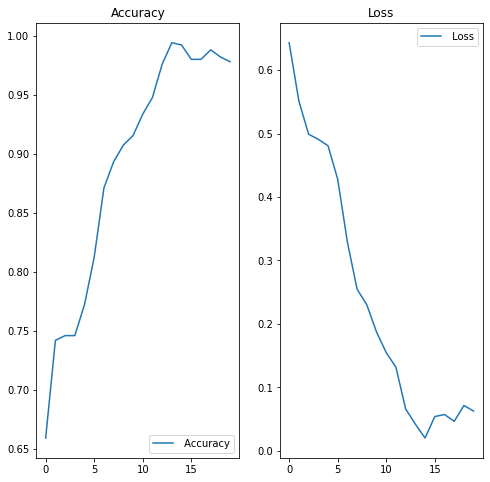

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

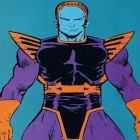

In [36]:
image_path = "/gdrive/My Drive/Zarek.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [37]:
pred = model.predict(scaled_img)

In [38]:
output = class_names[np.argmax(pred)]

In [39]:
output

'evil'

In [40]:
model.save("marvel_comics.h5")